In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt  # Import matplotlib
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import warnings 
warnings.simplefilter('ignore')

In [4]:
malware_dataset = pd.read_csv('datasets/MalwareArtifacts.csv', delimiter=',')
# Extacting artifacts samples fields "AddressOfEntryPoint" and "DllCharacteristics"
samples = malware_dataset.iloc[:, [0, 4]].values
targets = malware_dataset.iloc[:, 8].values
# Extract artifacts from my file
control_malware_dataset = pd.read_csv('datasets/MyMalwareArtifacts.csv', delimiter=',')
# Extacting artifacts samples fields "AddressOfEntryPoint" and "DllCharacteristics"
control_data = control_malware_dataset.iloc[:, [1, 5]].values
control_targets = control_malware_dataset.iloc[:, 9].values
print(control_data)
print(control_targets)


[[  319776    33120]
 [       0    34144]
 [       0    34144]
 [  416224    33120]
 [   27718    34144]
 [  512756    33120]
 [       0    34144]
 [20017144    33120]
 [   51536    33120]
 [   37200    33120]
 [  365348    33120]
 [ 1351844        0]
 [    4633        0]
 [  114282    34144]
 [  296691    33088]
 [    4294     1024]]
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


In [5]:
from sklearn.model_selection import train_test_split

training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.2, random_state=0)

In [6]:
print(training_samples.shape,testing_samples.shape, training_targets.shape, testing_targets.shape )

(109955, 2) (27489, 2) (109955,) (27489,)


In [7]:
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()

In [8]:
tree_classifier.fit(training_samples, training_targets)


DecisionTreeClassifier()

In [9]:
predictions = tree_classifier.predict(testing_samples)
control_predictions=tree_classifier.predict(control_data)

In [10]:
def compare_results(predicted_results, actual_results):
    count = 0
    
    for i in range(len(predicted_results)):
        if predicted_results[i] == actual_results[i]:
            print(f"Index {i}: Prediction is correct")
            count += 1
        else:
            print(f"Index {i}: Prediction is incorrect")

    print("Count:" + str(count))
    accuracy = count * 100 /len(predicted_results)
    return accuracy

In [11]:
accuracy = 100.0 * accuracy_score(testing_targets, predictions)
#print(testing_targets[-100:])
#print(predictions[-100:])
print("Predicted results:" + str(control_predictions))
print("Actual results   :" + str(control_targets))
print("Actual accuracy:" + str(compare_results(control_predictions, control_targets)))
print ("Decision Tree accuracy: " + str(accuracy))

Predicted results:[0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1]
Actual results   :[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
Index 0: Prediction is incorrect
Index 1: Prediction is correct
Index 2: Prediction is correct
Index 3: Prediction is incorrect
Index 4: Prediction is correct
Index 5: Prediction is correct
Index 6: Prediction is correct
Index 7: Prediction is correct
Index 8: Prediction is correct
Index 9: Prediction is correct
Index 10: Prediction is incorrect
Index 11: Prediction is incorrect
Index 12: Prediction is correct
Index 13: Prediction is incorrect
Index 14: Prediction is correct
Index 15: Prediction is incorrect
Count:10
Actual accuracy:62.5
Decision Tree accuracy: 96.2821492233257


In [12]:
rfc =  ensemble.RandomForestClassifier(n_estimators=50) 
rfc.fit(training_samples, training_targets)
accuracy = rfc.score(testing_samples, testing_targets)
print("Random Forest Classifier accuracy: " + str(accuracy*100) )

control_accuracy = rfc.score(control_data, control_targets)
print("Random Forest Classifier control accuracy: " + str(control_accuracy*100))

Random Forest Classifier accuracy: 96.34399214231148
Random Forest Classifier control accuracy: 81.25


In [13]:
text_tree = tree.export_text(tree_classifier)
print(text_tree)

|--- feature_1 <= 17592.00
|   |--- feature_1 <= 57.50
|   |   |--- feature_0 <= 894.00
|   |   |   |--- feature_0 <= 224.00
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  224.00
|   |   |   |   |--- feature_0 <= 628.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  628.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  894.00
|   |   |   |--- feature_0 <= 38084.50
|   |   |   |   |--- feature_0 <= 4473.00
|   |   |   |   |   |--- feature_0 <= 4408.00
|   |   |   |   |   |   |--- feature_0 <= 4380.50
|   |   |   |   |   |   |   |--- feature_0 <= 4100.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 3838.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 1528.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 1038.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   | 

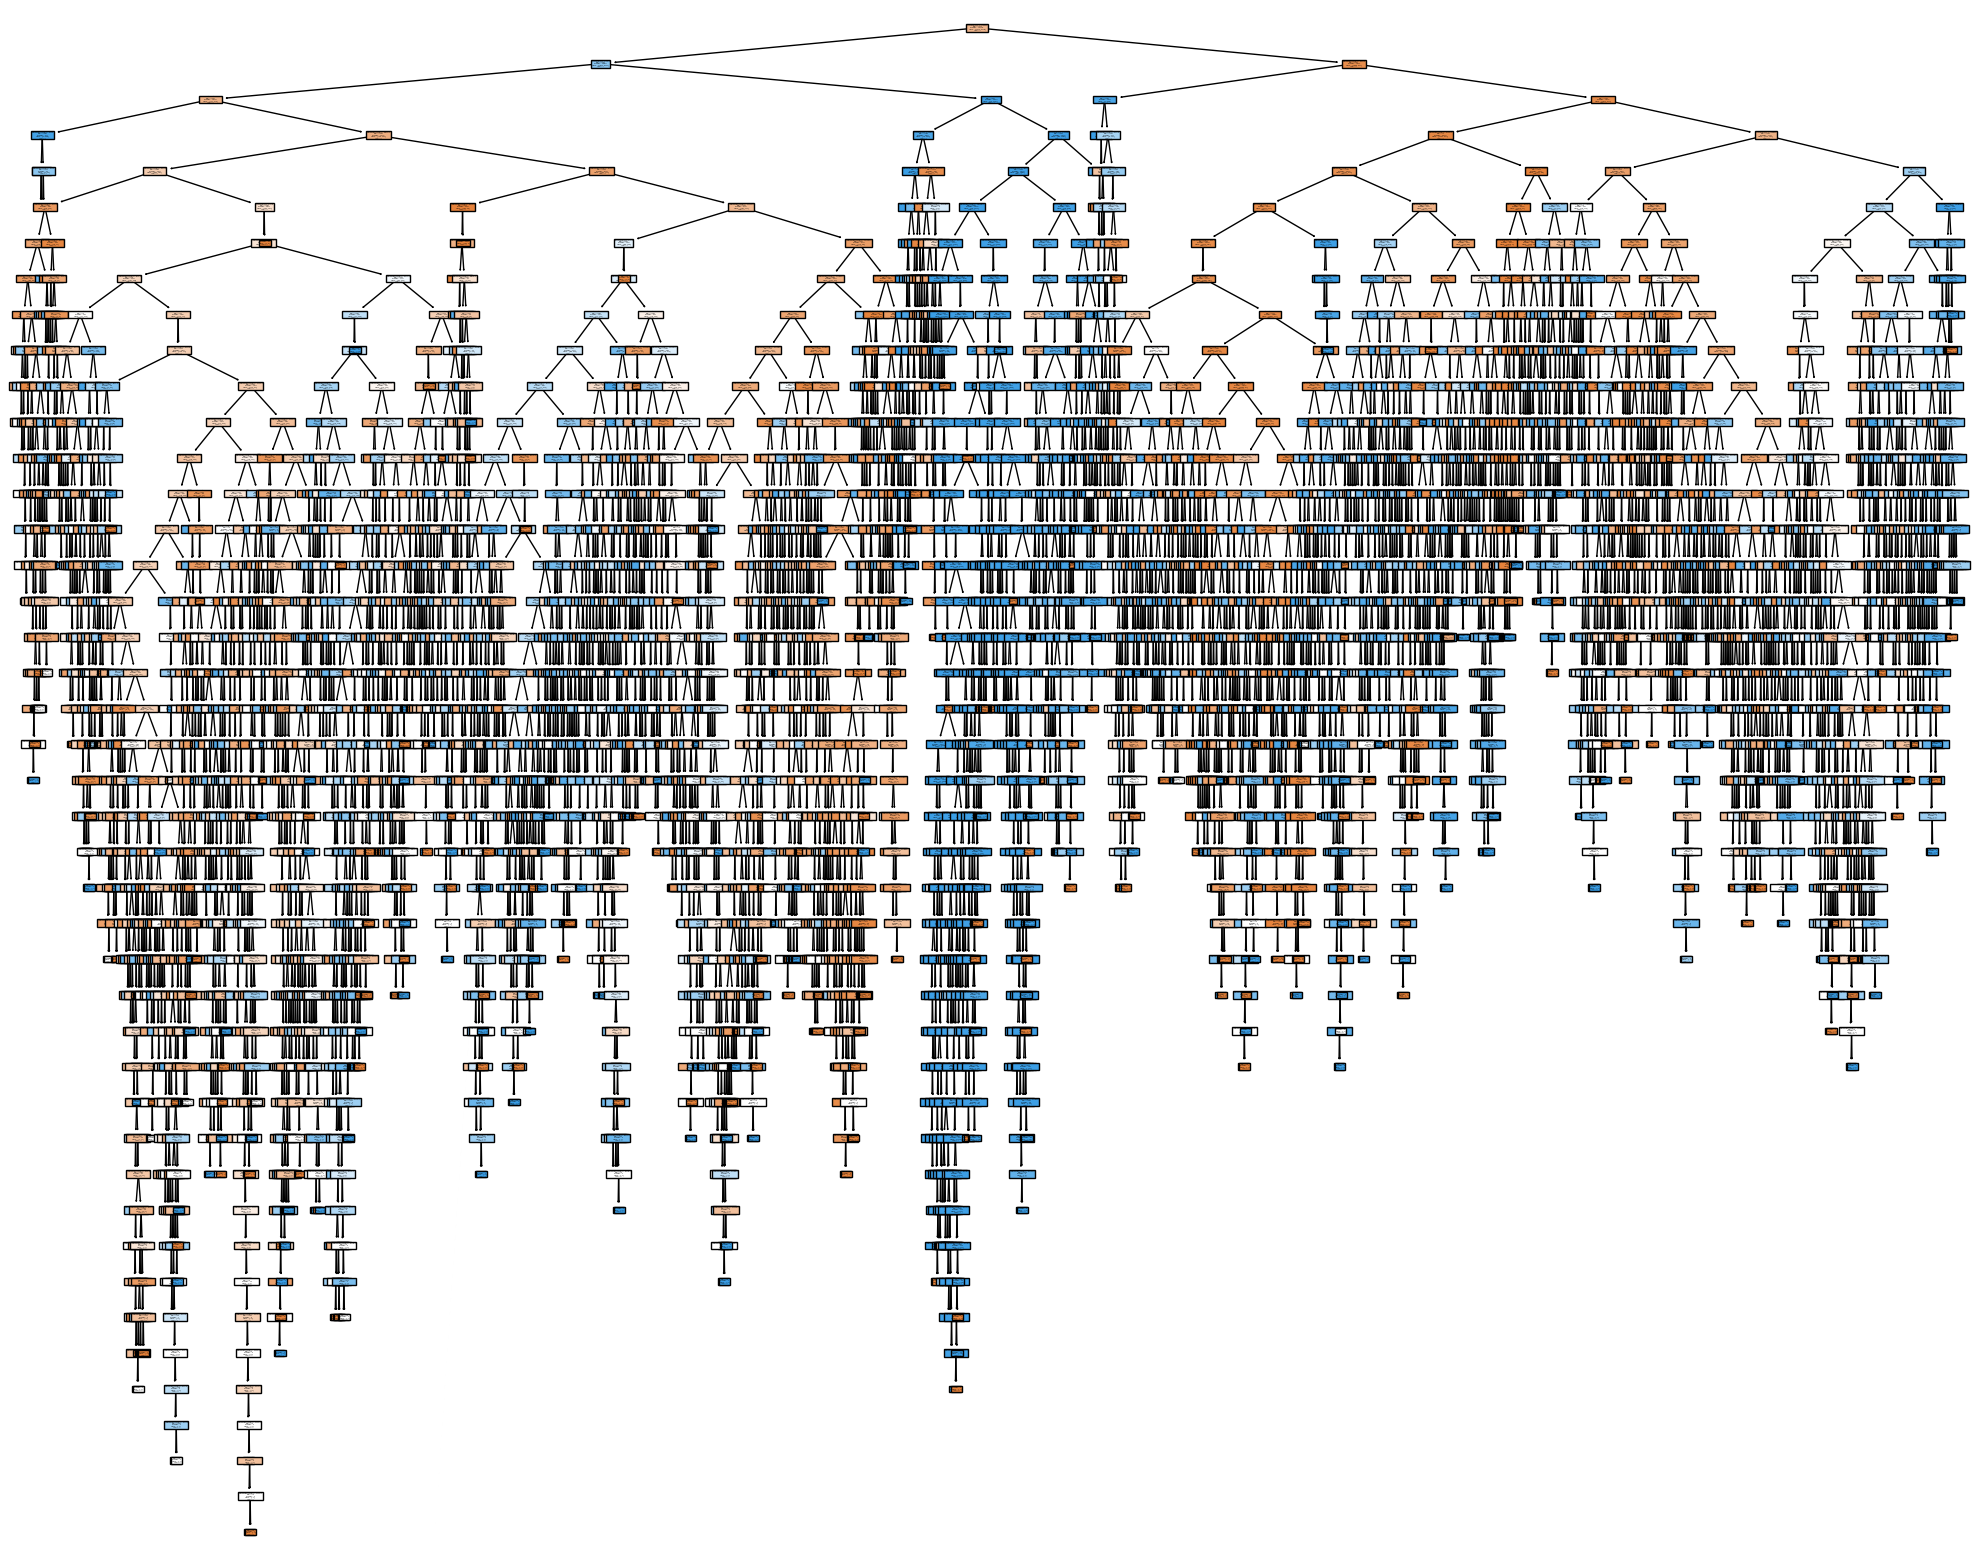

In [14]:
# Convert class names to strings
class_names_str = np.unique(control_targets).astype(str)

# Visualization
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(tree_classifier, 
                   feature_names=["AddressOfEntryPoint", "DllCharacteristics"],
                   class_names=class_names_str,
                   filled=True)

#plt.show()

In [15]:
#fig.savefig("decistion_tree.png")